In [10]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.ensemble import RandomForestClassifier

# Data Preprocess

In [11]:
data = pd.read_csv("UCI_Credit_Card.csv", sep = ",", header = 0)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## **check missing data**

In [3]:
test_data = data.copy()
test_data.isnull().sum()
# We can observe that all the 25 features have no missing values. 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

## **Data Visulization**

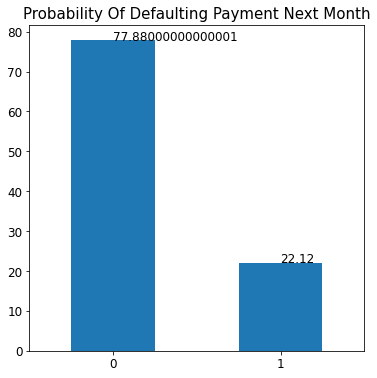

In [4]:
test_data.rename(columns={'default.payment.next.month':'default'}, inplace=True)
def_cnt = (test_data.default.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()


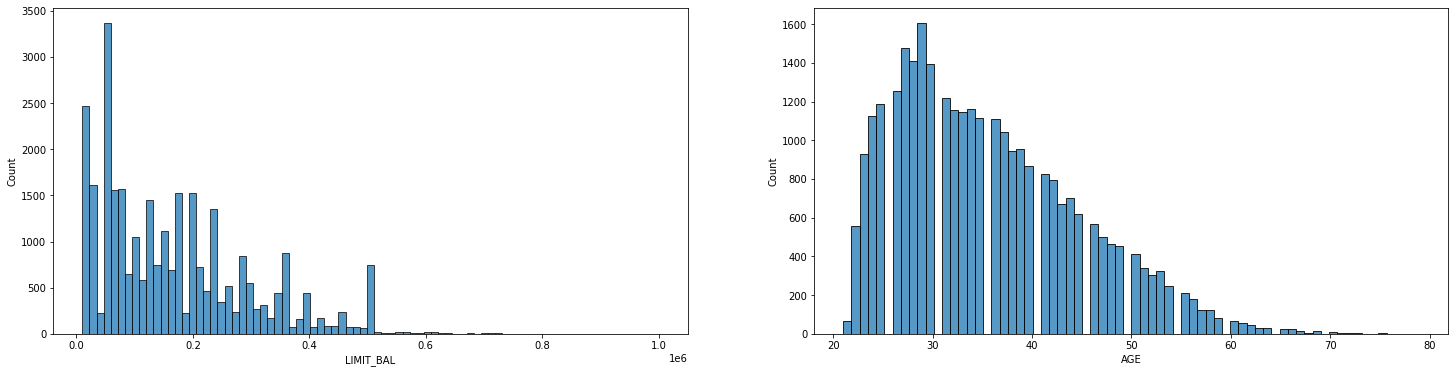

In [5]:
plt.subplots(figsize=(25,6))
plt.subplot(121)
sns.histplot(test_data.LIMIT_BAL)

plt.subplot(122)
sns.histplot(test_data.AGE)

plt.show()

#We can observe from the plots that both age and balance_limit are right skewed.
#Thus we can suggest that there are more clients with balance limit from 0 to 20000,
#and there are more clients with age from 20 to 40.

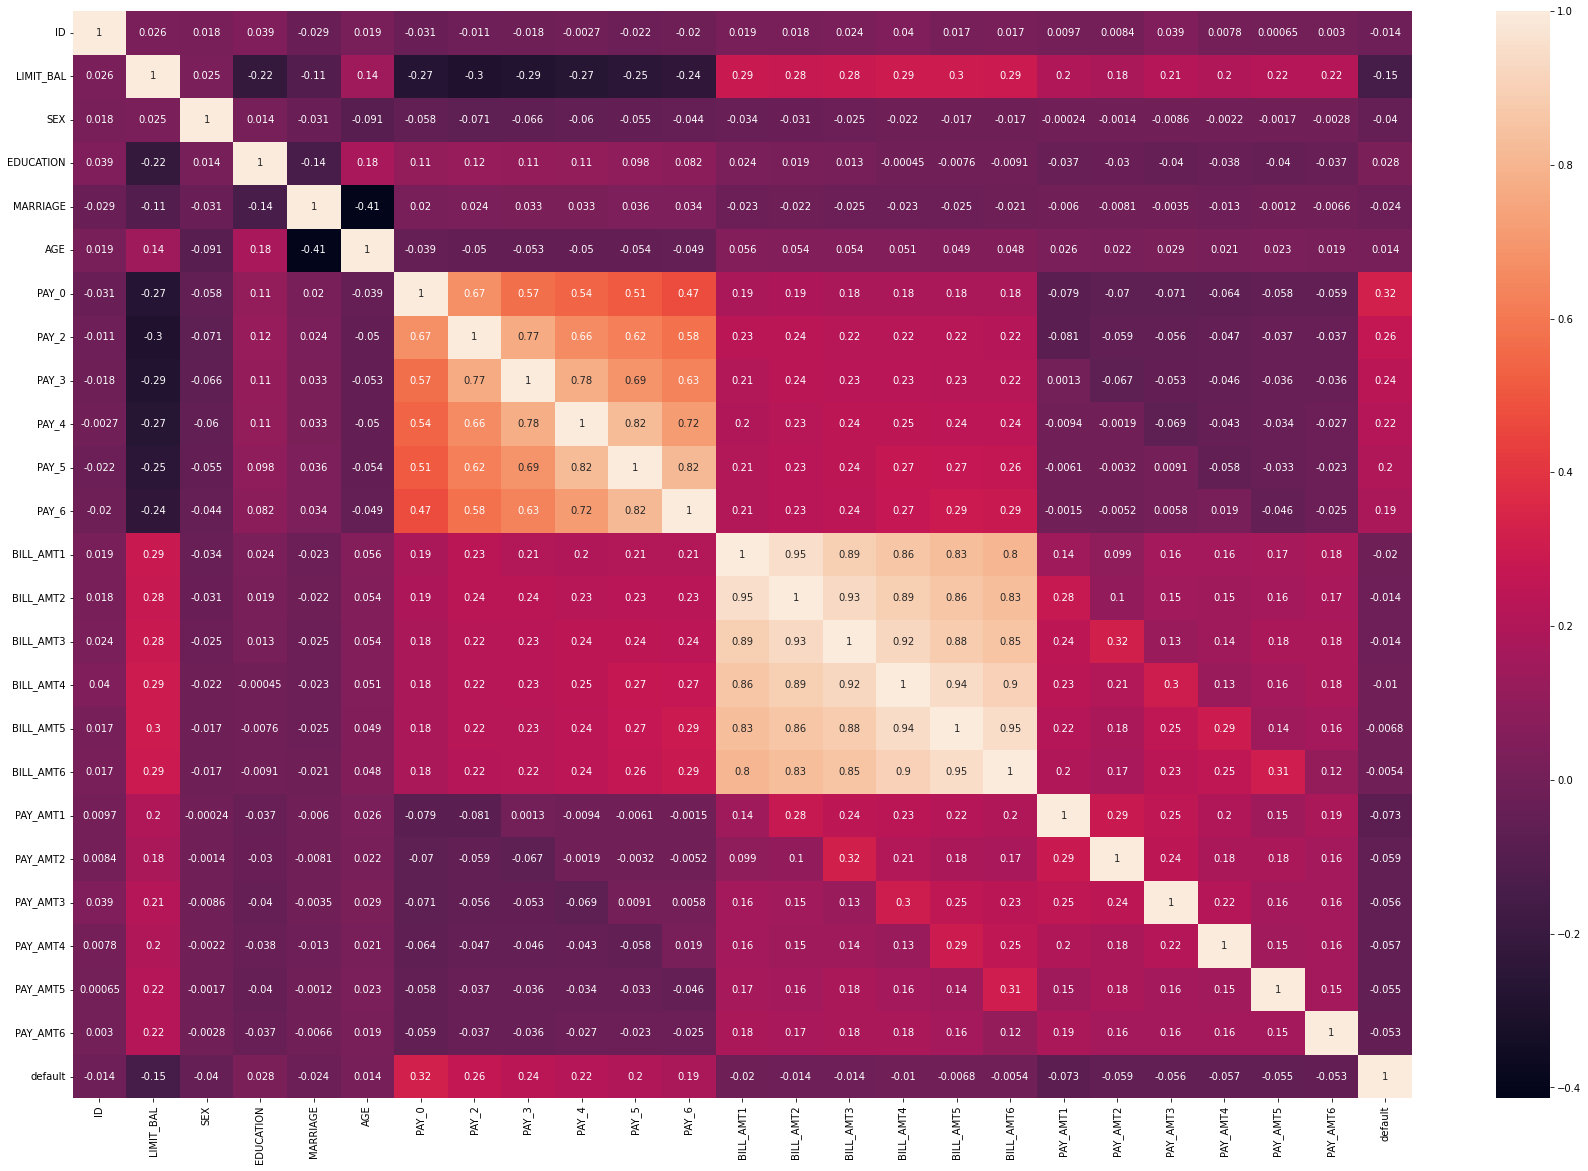

In [6]:
plt.subplots(figsize=(30,20))
sns.heatmap(test_data.corr(), annot=True)
plt.show()

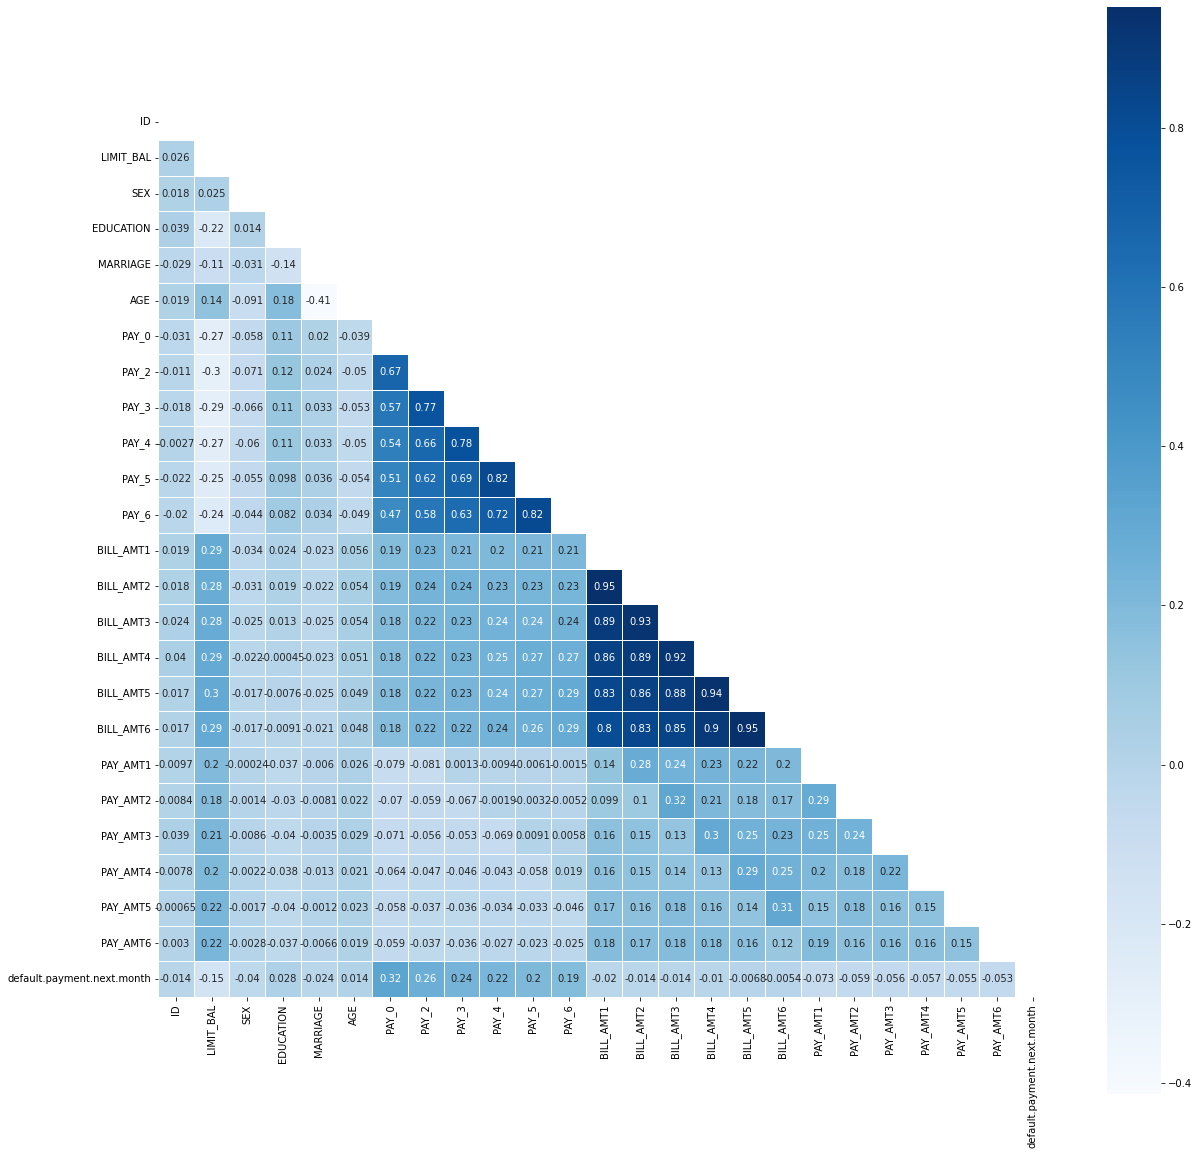

In [7]:
f,ax = plt.subplots(figsize=(20, 20))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot = True, cmap="Blues", linewidths=0.8, mask = mask, square=True)
plt.savefig('corrplot.png', dpi = 1200)
plt.show()

#Code inspiration from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Random Forest

In [8]:
X = data.copy()
X = X.drop(["default.payment.next.month",'ID'],axis=1)
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [9]:
y = data["default.payment.next.month"].values
y

array([1, 1, 0, ..., 1, 1, 1])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=123)

x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19682,200000.0,2,2,1,46,0,0,0,0,0,...,104137.0,103422.0,95206.0,65108.0,3692.0,5000.0,3300.0,2500.0,2930.0,1500.0
11062,120000.0,2,1,1,32,-1,-1,-1,-1,-1,...,326.0,476.0,802.0,326.0,652.0,326.0,476.0,802.0,0.0,326.0
197,20000.0,2,1,2,22,0,0,0,0,-1,...,19065.0,8332.0,18868.0,19247.0,1500.0,1032.0,541.0,20000.0,693.0,1000.0
23620,100000.0,2,5,2,34,0,0,0,0,0,...,87244.0,23181.0,7721.0,3219.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0
26031,290000.0,2,2,2,29,0,0,0,0,0,...,8389.0,8770.0,9145.0,10016.0,1130.0,1502.0,1300.0,500.0,1000.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,380000.0,2,2,1,37,0,0,0,0,0,...,13277.0,14291.0,15949.0,15556.0,1204.0,1300.0,1242.0,1900.0,0.0,3000.0
17730,360000.0,2,1,1,54,1,-2,-2,-1,0,...,0.0,2580.0,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0
28030,50000.0,2,3,1,29,0,0,0,0,0,...,46777.0,39420.0,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0
15725,30000.0,2,2,2,21,0,0,0,0,0,...,29435.0,30841.0,29434.0,16565.0,2000.0,2000.0,2000.0,1765.0,331.0,0.0


In [11]:

forest = RandomForestClassifier(n_estimators=100,
                                random_state=2)

forest.fit(x_train, y_train)
print("Test Accuracy: %0.2f" % forest.score(x_test, y_test))

Test Accuracy: 0.82


# Logistic Regression

**Model with all feature**

In [12]:
data_x = test_data.drop(['default'], axis = 1)
data_y = test_data.default

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=10)

model1 = LogisticRegression().fit(X_train, y_train)

y_predict = model1.predict(X_test)

print(y_predict)
print(classification_report(y_predict, y_test))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000



/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model with selected feature**

In [13]:
df_X = test_data[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_0']]
df_y = test_data.default

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=10)

model2 = LogisticRegression().fit(X_train, y_train)

y_predict2 = model2.predict(X_test)

print(y_predict2)
print(classification_report(y_predict2, y_test))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3000
           1       0.00      0.00      0.00         0

    accuracy                           0.79      3000
   macro avg       0.50      0.39      0.44      3000
weighted avg       1.00      0.79      0.88      3000



/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBoost

In [14]:
df = data.copy()


In [15]:
limit_bal = df["LIMIT_BAL"]
sex = df["SEX"]
edu = df["EDUCATION"]  
mari = df["MARRIAGE"] # Marital status (1=married, 2=single, 3=others)
age = df["AGE"]  #Age in years
pay_0 = df["PAY_0"] #Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
pay_2 = df["PAY_2"] #Repayment status in August, 2005 (scale same as above)
pay_3 = df["PAY_3"] #Repayment status in July, 2005 (scale same as above)
pay_4 = df["PAY_4"] #Repayment status in June, 2005 (scale same as above)
pay_5 = df["PAY_5"] #Repayment status in May, 2005 (scale same as above)
pay_6 = df["PAY_6"] #Repayment status in April, 2005 (scale same as above)
bill_amt1 = df["BILL_AMT1"] #Amount of bill statement in September, 2005 (NT dollar)
bill_amt2 = df["BILL_AMT2"] #Amount of bill statement in August, 2005 (NT dollar)
bill_amt3 = df["BILL_AMT3"] #Amount of bill statement in July, 2005 (NT dollar)
bill_amt4 = df["BILL_AMT4"] #Amount of bill statement in June, 2005 (NT dollar)
bill_amt5 = df["BILL_AMT5"] #Amount of bill statement in May, 2005 (NT dollar)
bill_amt6 = df["BILL_AMT6"] #Amount of bill statement in April, 2005 (NT dollar)
pay_amt1 = df["PAY_AMT1"] #Amount of previous payment in September, 2005 (NT dollar)
pay_amt2 = df["PAY_AMT2"] #Amount of previous payment in August, 2005 (NT dollar)
pay_amt3 = df["PAY_AMT3"] #Amount of previous payment in July, 2005 (NT dollar)
pay_amt4 = df["PAY_AMT4"] #Amount of previous payment in June, 2005 (NT dollar)
pay_amt5 = df["PAY_AMT5"] #Amount of previous payment in May, 2005 (NT dollar)
pay_amt6 = df["PAY_AMT6"] #Amount of previous payment in April, 2005 (NT dollar)
default = df["default.payment.next.month"]

In [16]:
limit_bal.corr(-default)

0.15351987639350761

In [17]:
sex.corr(default)

-0.039960577705441556

In [18]:
edu.corr(default)

0.02800607765624998

In [19]:
mari.corr(default)

-0.024339215683404195

In [20]:
age.corr(default)

0.013889834301963213

In [21]:
pay_0.corr(default)

0.32479372847862237

In [22]:
pay_2.corr(default)

0.2635512016721647

In [23]:
pay_3.corr(default)

0.23525251372491593

In [24]:
pay_4.corr(default)

0.2166136368424245

In [25]:
pay_5.corr(default)

0.2041489138761665

In [26]:
pay_6.corr(default)

0.18686636165354478

In [27]:
bill_amt1.corr(default)

-0.01964419714322154

In [28]:
bill_amt2.corr(default)

-0.014193218088215722

In [29]:
bill_amt3.corr(default)

-0.014075518043214769

In [30]:
bill_amt4.corr(default)

-0.010156495880289688

In [31]:
bill_amt5.corr(default)

-0.006760463841014724

In [32]:
bill_amt6.corr(default)

-0.005372314914815514

In [33]:
pay_amt1.corr(default)

-0.07292948777785141

In [34]:
pay_amt2.corr(default)

-0.05857870658290099

In [35]:
pay_amt3.corr(default)

-0.05625035099033111

In [36]:
pay_amt4.corr(default)

-0.056827400892887715

In [37]:
pay_amt5.corr(default)

-0.05512351562108853

In [38]:
pay_amt6.corr(default)

-0.05318334032612809

In [39]:
X, y = df.drop(["default.payment.next.month"], axis = 1), df["default.payment.next.month"]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_sub, X_valid, y_train_sub, y_valid = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 21000 4200 9000


In [3]:
import xgboost as xgb


boost = xgb.XGBClassifier()

boost.fit(X_train, y_train)

print(f"Training Accuracy: {boost.score(X_train, y_train)*100:0.3f}%")
print(f"Validation Accuracy: {boost.score(X_valid, y_valid)*100:0.3f}%")
print(f"Test Accuracy: {boost.score(X_test, y_test)*100:0.3f}%")

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/opt/miniconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/miniconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [2]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
import hyperopt.pyll.stochastic

ModuleNotFoundError: No module named 'hyperopt'

In [ ]:
hyperopt.pyll.stochastic.sample(hp.loguniform('test', 1e-5, 1)) # range e^{low} to e^{high}

In [ ]:
hyperopt.pyll.stochastic.sample(hp.qloguniform('test', 1e-5, 1, 0.1)) # rounded to 0.1

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import numpy as np



params =  {
    "n_estimators": hp.choice("n_estimators", [30, 50, 100, 300]),
        "learning_rate": hp.choice("learning_rate", [0.01]),
        "lambda": hp.loguniform("lambda", 1e-8, 1.0),
        "alpha": hp.loguniform("alpha", 1e-8, 1.0),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
    }


def optimization_objective(params):

    model = XGBClassifier(random_state=123, use_label_encoder=False, **params)
    model.fit(X_train, y_train)
    
    accuracies = cross_val_score(
        estimator=model, X=X_train, y=y_train, cv=10, n_jobs=-1)

    score = accuracies.mean()

    return {'loss':1-score, 'status': STATUS_OK}

In [41]:
trials = Trials()
best = fmin(fn=optimization_objective,
            space=params,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

NameError: name 'Trials' is not defined

In [42]:
best

NameError: name 'best' is not defined

In [43]:
from hyperopt import space_eval

best_params = space_eval(params, best)
print(best_params)

ModuleNotFoundError: No module named 'hyperopt'

In [4]:
model = XGBClassifier(random_state=123, use_label_encoder=False, **best_params)
model.fit(X_train, y_train)

NameError: name 'XGBClassifier' is not defined

In [ ]:
print(f"Training Accuracy: {model.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {model.score(X_test, y_test)*100:0.3f}%")

In [ ]:
#Using Prectors that has absolute correlation bigger than 0.1
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import datasets


X, y = df.drop(["default.payment.next.month","SEX" , "EDUCATION", "MARRIAGE" , "AGE" , "BILL_AMT1", "BILL_AMT2", "BILL_AMT3" , "BILL_AMT4" , "BILL_AMT5" ,"BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT1", "PAY_AMT2","PAY_AMT3" , "PAY_AMT4","PAY_AMT5","PAY_AMT6"] , axis = 1), df["default.payment.next.month"]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_sub, X_valid, y_train_sub, y_valid = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])

In [ ]:
import numpy as np
import xgboost as xgb


boost = xgb.XGBClassifier()

boost.fit(X_train, y_train)

print(f"Training Accuracy: {boost.score(X_train, y_train)*100:0.3f}%")
print(f"Validation Accuracy: {boost.score(X_valid, y_valid)*100:0.3f}%")
print(f"Test Accuracy: {boost.score(X_test, y_test)*100:0.3f}%")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

from mlxtend.evaluate import confusion_matrix
#or
#from sklearn.metrics import confusion_matrix



pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=5))

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)

confmat = confusion_matrix(y_test, y_pred)

print(confmat)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=confmat, figsize=(2, 2))
plt.show()

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()

In [ ]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
import hyperopt.pyll.stochastic

In [ ]:
hyperopt.pyll.stochastic.sample(hp.loguniform('test', 1e-5, 1)) # range e^{low} to e^{high}

In [ ]:
hyperopt.pyll.stochastic.sample(hp.qloguniform('test', 1e-5, 1, 0.1)) # rounded to 0.1

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import numpy as np



params =  {
    "n_estimators": hp.choice("n_estimators", [30, 50, 100, 300]),
        "learning_rate": hp.choice("learning_rate", [0.01]),
        "lambda": hp.loguniform("lambda", 1e-8, 1.0),
        "alpha": hp.loguniform("alpha", 1e-8, 1.0),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
    }


def optimization_objective(params):

    model = XGBClassifier(random_state=123, use_label_encoder=False, **params)
    model.fit(X_train, y_train)
    
    accuracies = cross_val_score(
        estimator=model, X=X_train, y=y_train, cv=10, n_jobs=-1)

    score = accuracies.mean()

    return {'loss':1-score, 'status': STATUS_OK}

In [ ]:
trials = Trials()
best = fmin(fn=optimization_objective,
            space=params,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

In [ ]:
best

In [ ]:
from hyperopt import space_eval

best_params = space_eval(params, best)
print(best_params)

In [ ]:
model = XGBClassifier(random_state=123, use_label_encoder=False, **best_params)
model.fit(X_train, y_train)

In [ ]:
print(f"Training Accuracy: {model.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {model.score(X_test, y_test)*100:0.3f}%")

# Gradient Boosting

In [5]:
def get_models():
    models = dict()
    # learning rate
    for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
        key = '%.4f' % i
        models[key] = GradientBoostingClassifier(learning_rate=i)
    return models
 

In [12]:
test_data = data.copy()
print(test_data.shape)
test_data.describe().T

(30000, 25)


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [17]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # collect the results from model evaluation
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [18]:
# training and testing 
test_data.rename(columns={'default.payment.next.month':'default'}, inplace=True)

X = test_data.drop(['default'], axis = 1)
y = test_data.default

In [19]:
# get learning models
models = get_models()

In [20]:
# evaluate the models and store results
results, rates = list(), list()
for rate, model in models.items():
    # evaluate the model and give score to results
    scores = evaluate_model(model, X, y)
    results.append(scores)
    rates.append(rate)
    # peek the results
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

NameError: name 'name' is not defined

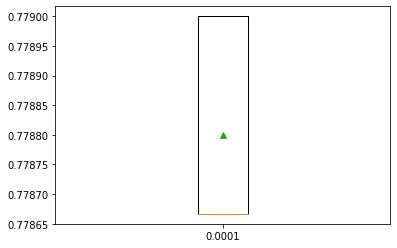

In [21]:
# plot for performance comparison
pyplot.boxplot(results, labels=rates, showmeans=True)
pyplot.show()